In [164]:
# Імпортуємо необхідні бібліотеки
from sklearn.datasets import make_classification
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix, roc_curve, auc
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
import numpy as np


# Для багатошарової нейронної мережі
import keras
import tensorflow as tf
from keras.models import Sequential
from keras.layers import Dense

   Feature 1  Feature 2  Class
0   0.601034   1.535353      1
1   0.755945  -1.172352      0
2   1.354479  -0.948528      0
3   3.103090   0.233485      0
4   0.753178   0.787514      1

Точність класифікації: 0.9
Звіт про класифікацію:
               precision    recall  f1-score   support

           0       0.88      0.93      0.91       104
           1       0.92      0.86      0.89        96

    accuracy                           0.90       200
   macro avg       0.90      0.90      0.90       200
weighted avg       0.90      0.90      0.90       200


Точність класифікації: 0.9
Точність (precision): 0.9222222222222223
Відгук (recall): 0.8645833333333334
F1-середнє: 0.89247311827957
AUC-ROC: 0.8986378205128206



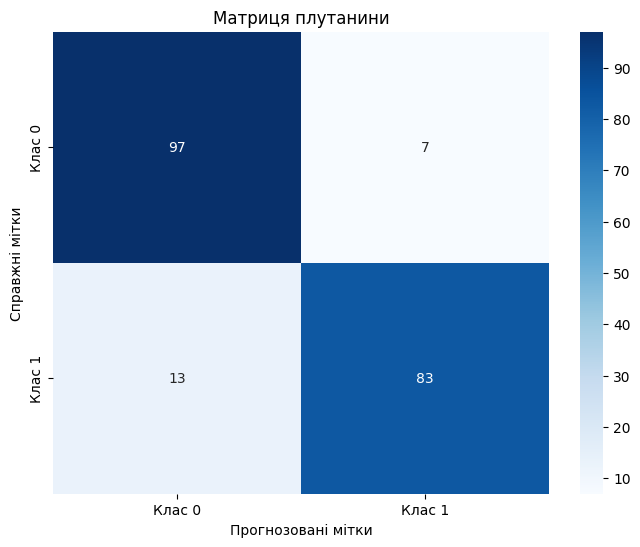

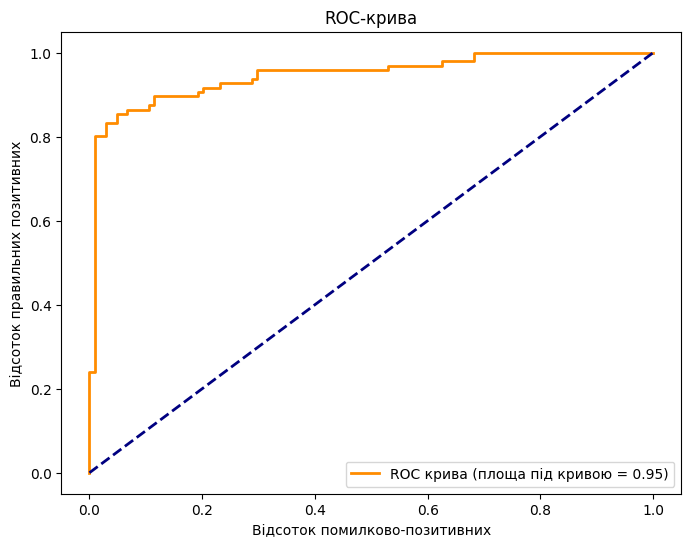

In [165]:
# Задаємо параметри для генерації даних
n_samples = 1000  # Загальна кількість прикладів
n_features = 2    # Кількість ознак
n_classes = 2     # Кількість класів

# Генеруємо набір даних
X, y = make_classification(n_samples=n_samples, n_features=n_features, n_informative=2,
                           n_redundant=0, n_clusters_per_class=1, n_classes=n_classes, random_state=42)

# Створюємо DataFrame для зручності роботи з даними
df = pd.DataFrame(X, columns=['Feature 1', 'Feature 2'])
df['Class'] = y

# Виводимо перші кілька рядків для перевірки
print(df.head())
print()

# Розділіть дані на навчальний та тестовий набори (наприклад, 80% для навчання та 20% для тестування)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42)

# Виведемо розміри навчальних та тестових наборів
# print("Розмір навчального набору:", X_train.shape)
# print("Розмір тестового набору:", X_test.shape)
# print()

# Створимо та навчимо логістичну регресію
model = LogisticRegression(random_state=42)
model.fit(X_train, y_train)

# Зробимо прогнози на тестовому наборі
y_pred = model.predict(X_test)

# Оцінимо точність класифікації
accuracy = accuracy_score(y_test, y_pred)
print("Точність класифікації:", accuracy)

# Виведемо звіт про класифікацію
print("Звіт про класифікацію:\n", classification_report(y_test, y_pred))
print()

# Зробимо прогнози на тестовому наборі
y_pred = model.predict(X_test)

# Оцінимо різні метрики
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred)

# Виведемо результати
print("Точність класифікації:", accuracy)
print("Точність (precision):", precision)
print("Відгук (recall):", recall)
print("F1-середнє:", f1)
print("AUC-ROC:", roc_auc)
print()

# Розраховуємо матрицю плутанини
cm = confusion_matrix(y_test, y_pred)

# Візуалізуємо матрицю плутанини за допомогою seaborn
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=[
            'Клас 0', 'Клас 1'], yticklabels=['Клас 0', 'Клас 1'])
plt.xlabel('Прогнозовані мітки')
plt.ylabel('Справжні мітки')
plt.title('Матриця плутанини')

# Візуалізуємо ROC-криву
fpr, tpr, thresholds = roc_curve(y_test, model.predict_proba(X_test)[:, 1])
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2,
         label='ROC крива (площа під кривою = {:.2f})'.format(roc_auc))
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('Відсоток помилково-позитивних')
plt.ylabel('Відсоток правильних позитивних')
plt.title('ROC-крива')
plt.legend(loc='lower right')
plt.show()

Логістична регресія:
Точність класифікації: 0.87
Відгук (recall): 0.87
F1-середнє: 0.8703114375521201


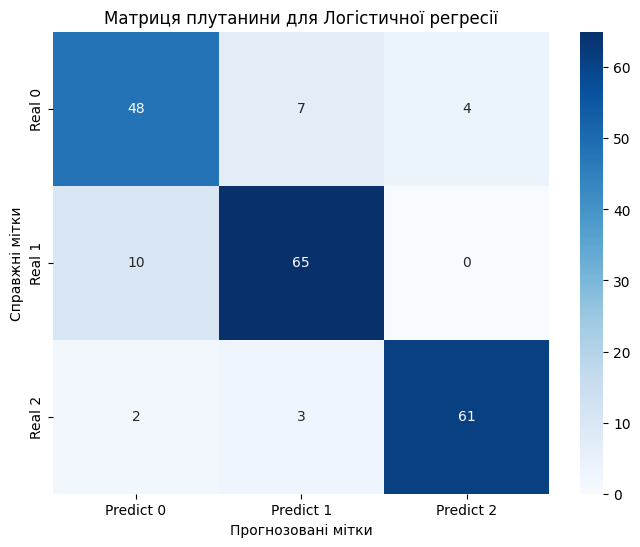

In [166]:
# Частина 2

# Задаємо параметри для генерації даних
n_samples = 1000  # Загальна кількість прикладів
n_features = 5  # Кількість ознак
n_classes = 3  # Кількість класів
n_clusters_per_class = 1  # Кількість кластерів для кожного класу

# Генеруємо набір даних
X, y = make_classification(
    n_samples=n_samples, n_features=n_features, n_classes=n_classes,
    n_clusters_per_class=n_clusters_per_class, random_state=42)

# Розділіть дані на навчальний та тестовий набори
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42)

# Створюємо DataFrame для зручності роботи з даними
df_multiclass = pd.DataFrame(
    X, columns=[f'Feature {i}' for i in range(1, n_features + 1)])
df_multiclass['Class'] = y

# Виводимо перші кілька рядків для перевірки
df_multiclass.head()


# Створюємо та навчаємо модель логістичної регресії
logreg_model = LogisticRegression(random_state=42, max_iter=500)
logreg_model.fit(X_train, y_train)


# Зробимо прогнози на тестовому наборі для логістичної регресії
y_pred_logreg = logreg_model.predict(X_test)

# Оцінимо різні метрики для логістичної регресії
accuracy_logreg = accuracy_score(y_test, y_pred_logreg)
precision_logreg = precision_score(y_test, y_pred_logreg, average='weighted')
recall_logreg = recall_score(y_test, y_pred_logreg, average='weighted')
f1_logreg = f1_score(y_test, y_pred_logreg, average='weighted')
confusion_matrix_logreg = confusion_matrix(y_test, y_pred_logreg)

# Виведемо результати
print("Логістична регресія:")
print("Точність класифікації:", accuracy_logreg)
print("Відгук (recall):", recall_logreg)
print("F1-середнє:", f1_logreg)


# Візуалізація матриці плутанини для логістичної регресії
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_matrix_logreg, annot=True, fmt="d", cmap="Blues", xticklabels=[
            f'Predict {i}' for i in range(n_classes)], yticklabels=[f'Real {i}' for i in range(n_classes)])
plt.xlabel('Прогнозовані мітки')
plt.ylabel('Справжні мітки')
plt.title('Матриця плутанини для Логістичної регресії')
plt.show()

In [167]:
from sklearn.ensemble import RandomForestClassifier


dataf = pd.read_csv('emails.csv')

# Encode the categorical variables
labelenc = LabelEncoder()
for column in dataf.select_dtypes(include=['object']).columns:
    dataf[column] = labelenc.fit_transform(dataf[column])

# Fill in any missing values
dataf.fillna(dataf.mean(), inplace=True)

# Split the data into training and test sets
x = dataf[['subject', 'body']]
y = dataf['spam']
xtrain, xtest, ytrain, ytest = train_test_split(
    x, y, test_size=0.2, random_state=13)

# Train the random forest classifier
mdl = RandomForestClassifier(random_state=13)
mdl.fit(xtrain, ytrain)

# Make predictions on the test set
ypred = mdl.predict(xtest)

# Evaluate the performance of the classifier
for lbl in ytest.unique():
    print('Performance evaluation for {}:'.format(lbl))
    idx = (ytest == lbl)
    print('    Accuracy: {:.2f}'.format(
        accuracy_score(ytest[idx], ypred[idx])))
    print('    Precision: {:.2f}'.format(precision_score(
        ytest[idx], ypred[idx], pos_label=lbl, zero_division=1)))
    print('    Recall: {:.2f}'.format(recall_score(
        ytest[idx], ypred[idx], pos_label=lbl, zero_division=1)))
    print('    F1-Score: {:.2f}'.format(f1_score(ytest[idx], ypred[idx])))
    print('\n')

Performance evaluation for 0:
    Accuracy: 1.00
    Precision: 1.00
    Recall: 1.00
    F1-Score: 0.00


Performance evaluation for 1:
    Accuracy: 0.00
    Precision: 1.00
    Recall: 0.00
    F1-Score: 0.00


Performance evaluation for 5:
    Accuracy: 0.00
    Precision: 1.00
    Recall: 0.00


C:\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1757: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no true nor predicted samples. Use `zero_division` parameter to control this behavior.
  # and BOTH prec and rec are ill-defined


ValueError: pos_label=1 is not a valid label. It should be one of [0, 5]